# Military Object Detection Training of Soldiers, Supply Trucks And Assult vehicles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install torch
import torch
from IPython.display import Image
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

import os
from random import choice
import shutil

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 112 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.54 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (10963/10963), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
# Create the directory path
directory = '/content/yolov5/temp_image_label'

# Create the directory if it doesn't already exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Source and destination paths
source_directory1 = '/content/drive/MyDrive/military/new/irdrone'
source_directory2 = '/content/drive/MyDrive/military/new/labels'
destination_directory = '/content/yolov5/temp_image_label'

# Copy files to the destination directory
shutil.copytree(source_directory1, destination_directory, dirs_exist_ok=True)
shutil.copytree(source_directory2, destination_directory, dirs_exist_ok=True)


base_directory = '/content/yolov5'
images_directory = os.path.join(base_directory, 'images')
labels_directory = os.path.join(base_directory, 'labels')
train_images_directory = os.path.join(images_directory, 'train')
val_images_directory = os.path.join(images_directory, 'val')
test_images_directory = os.path.join(images_directory, 'test')
train_labels_directory = os.path.join(labels_directory, 'train')
val_labels_directory = os.path.join(labels_directory, 'val')
test_labels_directory = os.path.join(labels_directory, 'test')

# Create the directories if they don't already exist
for directory in [
    train_images_directory, val_images_directory, test_images_directory,
    train_labels_directory, val_labels_directory, test_labels_directory
]:
    if not os.path.exists(directory):
        os.makedirs(directory)

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/yolov5/images/train'
valPath = '/content/yolov5/images/val'
testPath = '/content/yolov5/images/test'
crsPath = '/content/yolov5/temp_image_label' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
countForTest = int(len(imgs)*test_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)
print("Test images are : ",countForTest)

training images are :  178
Validation images are :  22
Test images are :  22


In [ ]:
trainimagePath = '/content/yolov5/images/train'
trainlabelPath = '/content/yolov5/labels/train'
valimagePath = '/content/yolov5/images/val'
vallabelPath = '/content/yolov5/labels/val'
testimagePath =  '/content/yolov5/images/test'
testlabelPath = '/content/yolov5/labels/test'

#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#cycle for val dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#cycle for test dir
for x in range(countForTest):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(testimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(testlabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, testPath)

'/content/yolov5/images/test/temp_image_label'

In [ ]:
source_file = "/content/drive/MyDrive/military/new/ir_config.yaml"
destination_directory = "/content/yolov5"

shutil.copy(source_file, destination_directory)

'/content/yolov5/ir_config.yaml'

In [ ]:
!python train.py --img 415 --batch 40 --epochs 300 --data ir_config.yaml --weights yolov5x.pt --freeze 10 --cfg yolov5s.yaml --cache --project "/content/drive/MyDrive/military/runs"  --name new_1 --workers 6

train: weights=yolov5x.pt, cfg=yolov5s.yaml, data=ir_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=40, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=6, project=/content/drive/MyDrive/military/runs, name=new_1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
!python val.py --weight '/content/drive/MyDrive/military/runs/new_1/weights/best.pt' --data ir_config.yaml  --task test --project "/content/drive/MyDrive/military/runs"

val: data=ir_config.yaml, weights=['/content/drive/MyDrive/military/runs/new_1/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/drive/MyDrive/military/runs, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/labels/test... 22 images, 223 backgrounds, 0 corrupt: 100% 245/245 [00:25<00:00,  9.45it/s]
test: WARNING ⚠️ /content/yolov5/images/test/image (1).jpg: corrupt JPEG restored and saved
test: WARNING ⚠️ /content/yolov5/images/test/image (106).jpg: corrupt JPEG restored and saved
test: WARNING ⚠️ /content/yolov5/images/test/image (114).jpg: corrupt JPEG restored and saved
test

In [ ]:
dst_file = "/content/yolov5"
src_file = "/content/drive/MyDrive/military/new/video4.mp4"

shutil.copy(src_file, dst_file)

In [ ]:
!python detect.py --source video4.mp4 --weight '/content/drive/MyDrive/military/runs/new_1/weights/best.pt' --project "/content/drive/MyDrive/military/runs" --conf 0.5

detect: weights=['/content/drive/MyDrive/military/runs/new_1/weights/best.pt'], source=video4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/military/runs, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/472) /content/yolov5/video4.mp4: 384x640 1 Assult Vehicle, 39.9ms
video 1/1 (2/472) /content/yolov5/video4.mp4: 384x640 1 Assult Vehicle, 7.9ms
video 1/1 (3/472) /content/yolov5/video4.mp4: 384x640 1 Assult Vehicle, 7.9ms
video 1/1 (4/472) /content/yolov5/video4.mp4: 384x640 1 Assult Veh

# Results output

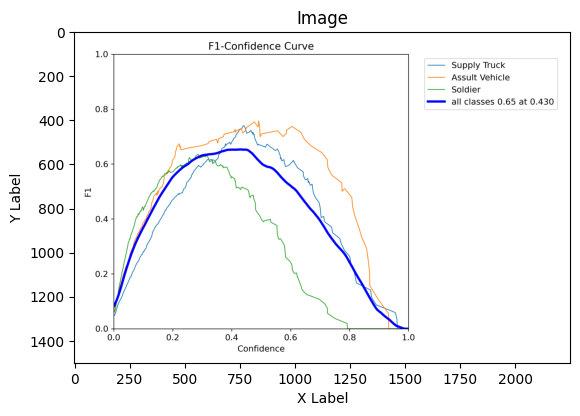

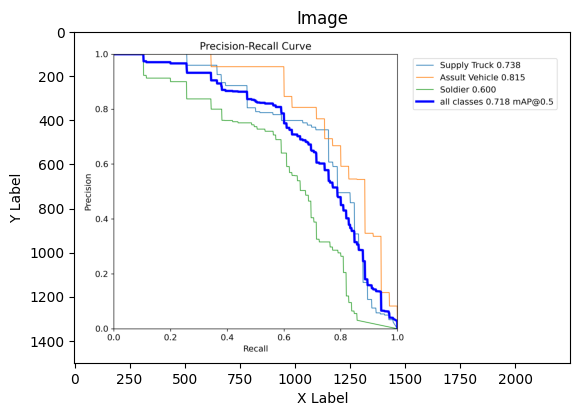

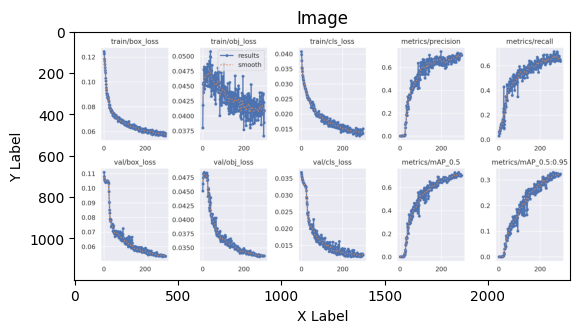

In [ ]:
#training results
import matplotlib.pyplot as plt
from PIL import Image

image_paths = [
    "/content/drive/MyDrive/military/runs/new_12/F1_curve.png",
    "/content/drive/MyDrive/military/runs/new_12/PR_curve.png",
    "/content/drive/MyDrive/military/runs/new_12/results.png"
]

for image_path in image_paths:
    image = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_title('Image')
    plt.show()

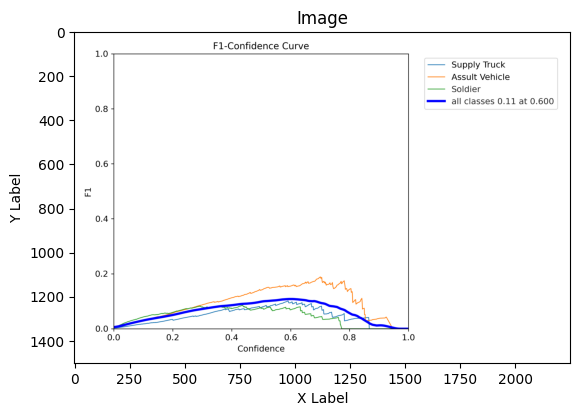

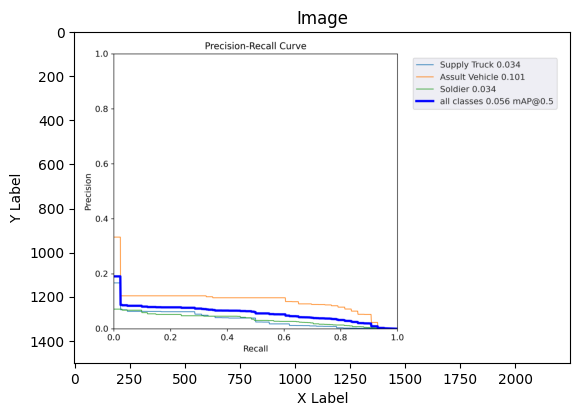

In [ ]:
#test reuslts

image_paths = [
    "/content/drive/MyDrive/military/runs/exp32/F1_curve.png",
    "/content/drive/MyDrive/military/runs/exp32/PR_curve.png",
]

for image_path in image_paths:
    image = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_title('Image')
    plt.show()